In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('RecordedDebatingDataset_Release5_metadata.csv')

In [3]:
# Displaying the few first rows of the dataset
df.head()


,#,speech-id,motion-id,motion,short-topic-description,speech-to-motion-polarity,speaker-name,responds-to-speaker-name,responde-type,wav-file-name,asr-file-name,clean-asr-file-name,transcript-file-name,clean-transcript-file-name
0,1,TL_121_ban-boxing_pro,121,We should ban boxing,ban-boxing,pro,TL,NaN,NaN,TL_121_ban-boxing_pro.wav,TL_121_ban-boxing_pro.asr,TL_121_ban-boxing_pro.asr.txt,TL_121_ban-boxing_pro.trs,TL_121_ban-boxing_pro.trs.txt
1,2,DJ_3162_multiculturalism_pro,3162,We should adopt multiculturalism,multiculturalism,pro,DJ,NaN,NaN,DJ_3162_multiculturalism_pro.wav,DJ_3162_multiculturalism_pro.asr,DJ_3162_multiculturalism_pro.asr.txt,DJ_3162_multiculturalism_pro.trs,DJ_3162_multiculturalism_pro.trs.txt
2,3,WS_2489_no-knock_pro,2489,We should abolish no-knock warrants,no-knock,pro,WS,NaN,NaN,WS_2489_no-knock_pro.wav,WS_2489_no-knock_pro.asr,WS_2489_no-knock_pro.asr.txt,WS_2489_no-knock_pro.trs,WS_2489_no-knock_pro.trs.txt
3,4,HE_2109_social-security-tax_con_WS_explicit,2109,We should cancel the Social Security tax,social-security-tax,con,HE,WS,explicit,HE_2109_social-security-tax_con_WS_explicit.wav,HE_2109_social-security-tax_con_WS_explicit.asr,HE_2109_social-security-tax_con_WS_explicit.as...,HE_2109_social-security-tax_con_WS_explicit.trs,HE_2109_social-security-tax_con_WS_explicit.tr...
4,5,JL_3164_open-primaries_pro,3164,We should abolish open primaries in the United...,open-primaries,pro,JL,NaN,NaN,JL_3164_open-primaries_pro.wav,JL_3164_open-primaries_pro.asr,JL_3164_open-primaries_pro.asr.txt,JL_3164_open-primaries_pro.trs,JL_3164_open-primaries_pro.trs.txt


In [4]:
# Displaying the structure of the dataset
print("Dataset Structure:")
df.info()

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   #                           3562 non-null   int64 
 1   speech-id                   3562 non-null   object
 2   motion-id                   3562 non-null   int64 
 3   motion                      3562 non-null   object
 4   short-topic-description     3562 non-null   object
 5   speech-to-motion-polarity   3562 non-null   object
 6   speaker-name                3562 non-null   object
 7   responds-to-speaker-name    1685 non-null   object
 8   responde-type               1685 non-null   object
 9   wav-file-name               3562 non-null   object
 10  asr-file-name               3562 non-null   object
 11  clean-asr-file-name         3562 non-null   object
 12  transcript-file-name        3562 non-null   object
 13  clean-transcript-file-name  3

In [5]:
# checking for the missing values
df.isnull().sum()


#                                0
speech-id                        0
motion-id                        0
motion                           0
short-topic-description          0
speech-to-motion-polarity        0
speaker-name                     0
responds-to-speaker-name      1877
responde-type                 1877
wav-file-name                    0
asr-file-name                    0
clean-asr-file-name              0
transcript-file-name             0
clean-transcript-file-name       0
dtype: int64

In [6]:
# Identifying unique class labels in the 'Motion' column
df['motion'].unique()

array(['We should ban boxing', 'We should adopt multiculturalism',
       'We should abolish no-knock warrants',
       'We should cancel the Social Security tax',
       'We should abolish open primaries in the United States',
       'We should ban private education',
       'Abstinence-only sex education should be mandatory',
       'We should adopt the teacher tenure reform',
       'We should subsidize embryonic stem cell research',
       'Boarding schools should be abolished',
       'We should adopt direct democracy',
       'We should introduce year round schooling',
       'We should prohibit international adoption',
       'We should ban human cloning',
       'Prenatal diagnosis should be mandatory',
       'We should lower the drinking age', 'We should ban organic food',
       'We should cancel the speed limit',
       'We should ban trans fats usage in food',
       'We should ban lotteries', 'Sex education should be mandatory',
       'We should fight nationalism',
     

In [7]:
# counting the occurrences of each class label
df['motion'].value_counts()

motion
We should ban racial profiling                  22
We should ban abortions                         21
We should abolish the American Jobs Act         20
We should abandon television                    20
We should ban organic food                      19
                                                ..
Criticism of the Iraq War is justified           1
We should not subsidize athletes                 1
We should disband Planned Parenthood             1
We should abandon motorcycles                    1
Emergency contraception should be subsidized     1
Name: count, Length: 440, dtype: int64

In [8]:
# displaying the distribution of 'speech-to-motion-polarity'
df['speech-to-motion-polarity'].value_counts()


speech-to-motion-polarity
con    1833
pro    1729
Name: count, dtype: int64

In [9]:
# Performing statistical analysis using numpy 
# calculating mean, median and standard deviation for the numerical columns
numerical_col = df.select_dtypes(include = [np.number]).columns
for column in numerical_col:
    mean = np.mean(df[column])
    median = np.median(df[column])
    std_dev = np.std(df[column])
    print("Mean:",mean , "Median:",median,"Standard Deviation:",std_dev)

Mean: 1781.5 Median: 1781.5 Standard Deviation: 1028.2607889052272
Mean: 2621.9034250421114 Median: 2656.0 Standard Deviation: 970.6193523857723


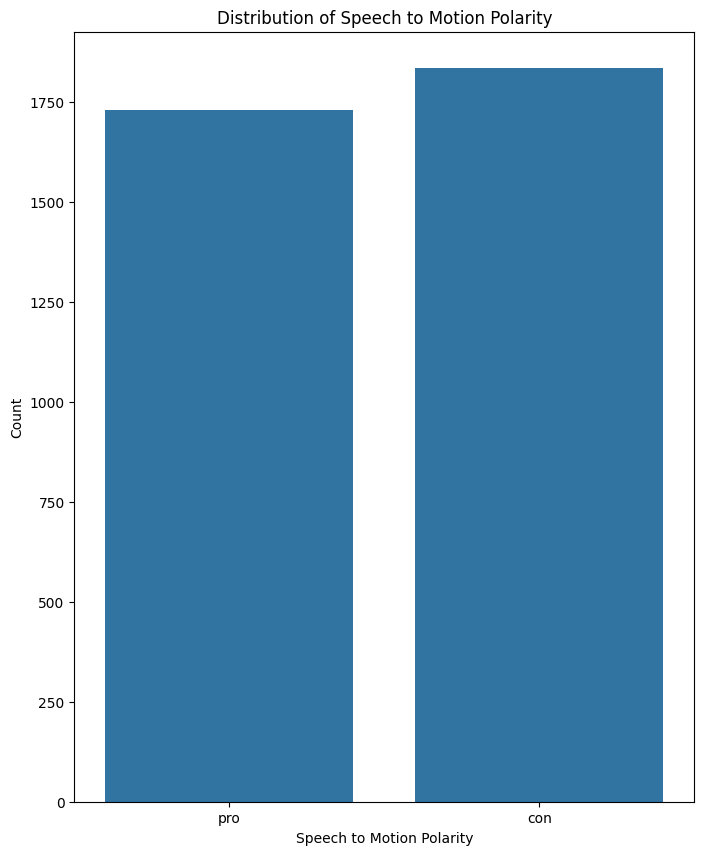

In [10]:
# Visualize the distribution of class labels 
plt.figure(figsize=(8,10))
sns.countplot(data=df,x='speech-to-motion-polarity')
plt.title('Distribution of Speech to Motion Polarity')
plt.xlabel('Speech to Motion Polarity')
plt.ylabel('Count')
plt.show()